`Import Library`

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [76]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


`Import Data`

In [77]:
data = pd.read_csv('/content/drive/MyDrive/project/PORTODATA/salarydataset/Salary Dataset.csv')
data.head()

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"


*Mengetahui Isi Data / Data Knowledge*

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4341 non-null   object 
 1   Job Title          4344 non-null   object 
 2   Salaries Reported  4342 non-null   float64
 3   Location           4344 non-null   object 
 4   Salary             4344 non-null   object 
dtypes: float64(1), object(4)
memory usage: 169.8+ KB


In [79]:
col = ['Location','Job Title']

for i in col:
  print(data[i].unique())

['Bangalore' 'Pune' 'Hyderabad' 'New Delhi' 'Mumbai']
['Data Scientist' 'Data Science Associate' 'Data Science Consultant'
 'Data Science' 'Senior Data Scientist' 'Junior Data Scientist'
 'Lead Data Scientist' 'Data Science Manager' 'Data Scientist - Trainee'
 'Data Science Lead' 'Data Analyst' 'Data Engineer'
 'Machine Learning Engineer' 'Machine Learning Software Engineer'
 'Software Engineer - Machine Learning'
 'Machine Learning Engineer/Data Scientist' 'Machine Learning Consultant'
 'Machine Learning Data Associate' 'Machine Learning Data Associate I'
 'Machine Learning Associate' 'Machine Learning Data Associate II'
 'Associate Machine Learning Engineer' 'Machine Learning Data Analyst'
 'Senior Machine Learning Engineer' 'Machine Learning Scientist'
 'Machine Learning Developer']


*Deteksi MissingValue*

In [80]:
data.isna().sum()

Company Name         3
Job Title            0
Salaries Reported    2
Location             0
Salary               0
dtype: int64

`menghapus missing value`

In [81]:
data = data.dropna()
data.isna().sum()

Company Name         0
Job Title            0
Salaries Reported    0
Location             0
Salary               0
dtype: int64

*Data Preparation*

In [82]:
data[['Gaji','jangkawaktu']] = data['Salary'].str.split('/',n=1,expand=True) #langkah menjadikan satuan gaji yang sama
data['jangkawaktu'].value_counts()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


yr    3229
mo    1088
hr      22
Name: jangkawaktu, dtype: int64

In [83]:
data["matauang_gaji"] = data["Salary"].apply(lambda x: x[0])
data["matauang_gaji"].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


₹    4313
$      19
£       6
A       1
Name: matauang_gaji, dtype: int64

In [84]:
data[data.Salary.str.contains('A')]

,Company Name,Job Title,Salaries Reported,Location,Salary,Gaji,jangkawaktu,matauang_gaji
2278,md,Data Analyst,1.0,Pune,"AFN 1,56,179/yr","AFN 1,56,179",yr,A


In [85]:
data['Salary'] = data['Salary'].str.replace('AFN','A')

In [86]:
data["Gaji"] = data["Salary"].apply(lambda x: int(x[1:x.find("/")].replace(",", "")))
data.head()

,Company Name,Job Title,Salaries Reported,Location,Salary,Gaji,jangkawaktu,matauang_gaji
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",648573,yr,₹
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",1191950,yr,₹
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",836874,yr,₹
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",669578,yr,₹
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",944110,yr,₹


`jangka waktu diubah dalam satuan tahun`

In [87]:
def gaji_satuantahun(x):
    if x.jangkawaktu == "hr":
        return x.Gaji * 365
    elif x.jangkawaktu == "mo":
        return x.Gaji * 12
    else:
        return x.Gaji

In [88]:
data['Gaji_2'] = data.apply(gaji_satuantahun,axis=1)
data.head()

,Company Name,Job Title,Salaries Reported,Location,Salary,Gaji,jangkawaktu,matauang_gaji,Gaji_2
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",648573,yr,₹,648573
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",1191950,yr,₹,1191950
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",836874,yr,₹,836874
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",669578,yr,₹,669578
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",944110,yr,₹,944110


`mata uang diubah dalam satuan rupiah`

In [89]:
def gaji_rupiah(x):
    if x.matauang_gaji == "₹":
        return round(x.Gaji_2 * 189.64)
    elif x.matauang_gaji == "$":
        return round(x.Gaji_2 * 14344.75)
    elif x.matauang_gaji == "£":
        return round(x.Gaji_2 * 19463.27)
    else:
        return round(x.Gaji_2 * 155.20)

In [90]:
  round(189.64*648573)

122995384

In [91]:
data['Gaji(Rp)_pertahun'] = data.apply(gaji_rupiah,axis = 1)
data.head()

,Company Name,Job Title,Salaries Reported,Location,Salary,Gaji,jangkawaktu,matauang_gaji,Gaji_2,Gaji(Rp)_pertahun
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",648573,yr,₹,648573,122995384
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr",1191950,yr,₹,1191950,226041398
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr",836874,yr,₹,836874,158704785
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr",669578,yr,₹,669578,126978772
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr",944110,yr,₹,944110,179041020


In [92]:
data = data.drop(data.columns[[4,5,6,7,8]],axis=1)
data.head()

,Company Name,Job Title,Salaries Reported,Location,Gaji(Rp)_pertahun
0,Mu Sigma,Data Scientist,105.0,Bangalore,122995384
1,IBM,Data Scientist,95.0,Bangalore,226041398
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,158704785
3,Impact Analytics,Data Scientist,40.0,Bangalore,126978772
4,Accenture,Data Scientist,32.0,Bangalore,179041020


In [93]:
data.describe(include="object")

,Company Name,Job Title,Location
count,4339,4339,4339
unique,2528,25,5
top,Tata Consultancy Services,Data Scientist,Bangalore
freq,41,1844,1584


In [94]:
data.describe()

,Salaries Reported,Gaji(Rp)_pertahun
count,4339.000000,4.339000e+03
mean,2.777138,2.130567e+08
std,5.148095,8.381309e+08
min,1.000000,2.050767e+06
25%,1.000000,7.956346e+07
50%,1.000000,1.338511e+08
75%,3.000000,2.267709e+08
max,105.000000,3.259712e+10


In [95]:
#replace value dalam variabel

data['Job Title'] = data['Job Title'].apply(lambda col: 'Data Scientist' if col == 'Data Science' else col)
data['Job Title'] = data['Job Title'].apply(lambda col: 'Junior Data Scientist' if col == 'Data Scientist - Trainee' else col)

(array([0.e+00, 2.e+08, 4.e+08, 6.e+08, 8.e+08, 1.e+09]),
 <a list of 6 Text major ticklabel objects>)

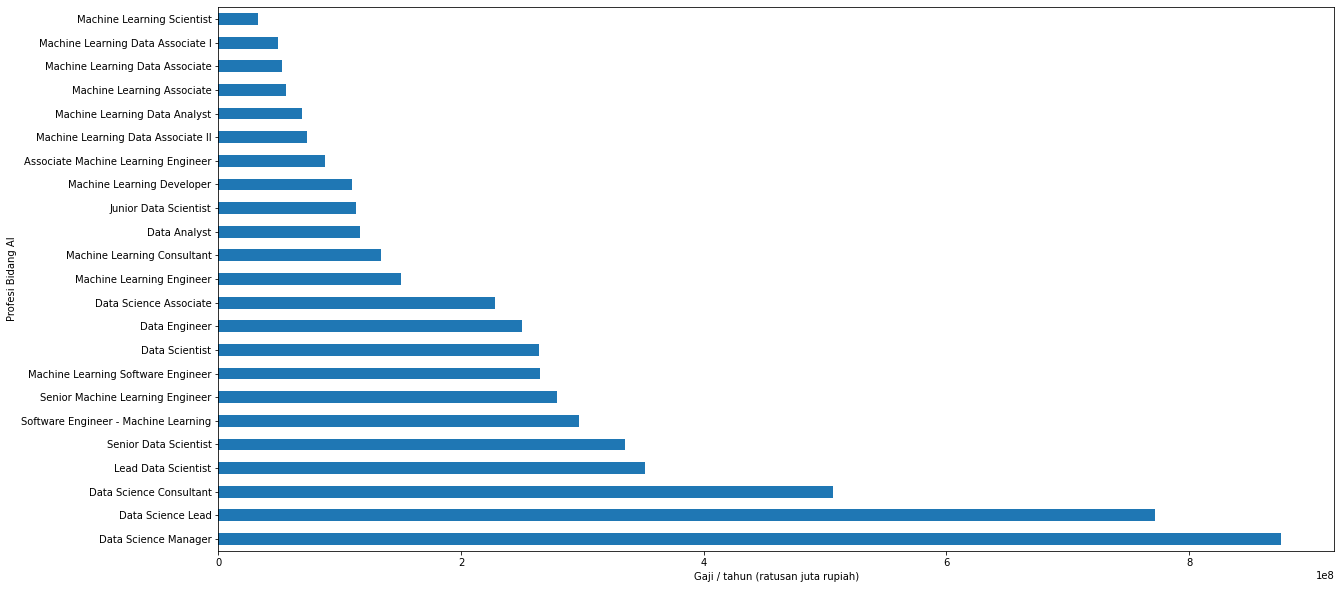

In [96]:
plt.figure(figsize=(20, 10))
data.groupby(['Job Title']).mean()['Gaji(Rp)_pertahun'].sort_values(ascending=False).plot(kind='barh')
plt.ylabel('Profesi Bidang AI')
plt.xlabel('Gaji / tahun (ratusan juta rupiah)')
plt.xticks(rotation='0')

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

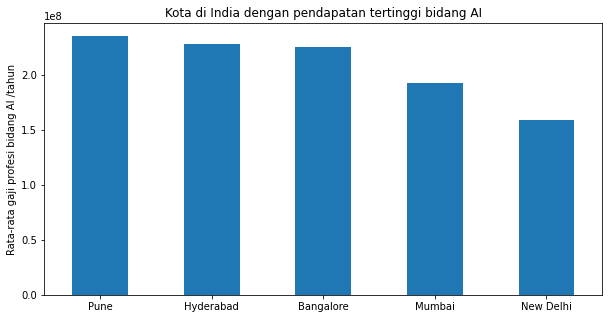

In [97]:
plt.figure(figsize=(10, 5))
data.groupby(['Location']).mean()['Gaji(Rp)_pertahun'].sort_values(ascending=False).plot(kind='bar')
plt.title('Kota di India dengan pendapatan tertinggi bidang AI')
plt.xlabel('')
plt.ylabel('Rata-rata gaji profesi bidang AI /tahun')
plt.xticks(rotation='0')

`pengelompokan kelas variabel profesi`

In [98]:
#1
DataScience =  data[data['Job Title'].isin(['Data Scientist', 'Data Science Associate','Data Science Consultant', 'Senior Data Scientist',
                                            'Junior Data Scientist', 'Lead Data Scientist','Data Science Manager', 'Data Science Lead'])]
DataScience['Bidang AI'] = 'Data Science'
#2
DataAnalysis = data[data['Job Title'].isin(['Data Analyst'])]
DataAnalysis['Bidang AI'] = 'Data Analysis'
#3
DataEngineer = data[data['Job Title'].isin(['Data Engineer'])]
DataEngineer['Bidang AI'] = 'Data Engineering'
#4
MachineLearning = data[data['Job Title'].isin(['Machine Learning Engineer','Machine Learning Software Engineer','Software Engineer - Machine Learning',
                                              'Machine Learning Engineer/Data Scientist','Machine Learning Consultant', 'Machine Learning Data Associate',
                                              'Machine Learning Data Associate I', 'Machine Learning Associate','Machine Learning Data Associate II',
                                              'Associate Machine Learning Engineer','Machine Learning Data Analyst','Senior Machine Learning Engineer',
                                              'Machine Learning Scientist','Machine Learning Developer'])]
MachineLearning['Bidang AI'] = 'Machine Learning'

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [99]:
data = pd.concat([DataScience,DataAnalysis,DataEngineer,MachineLearning],axis = 0)

Text(0, 0.5, 'Rata-rata gaji profesi bidang AI /tahun')

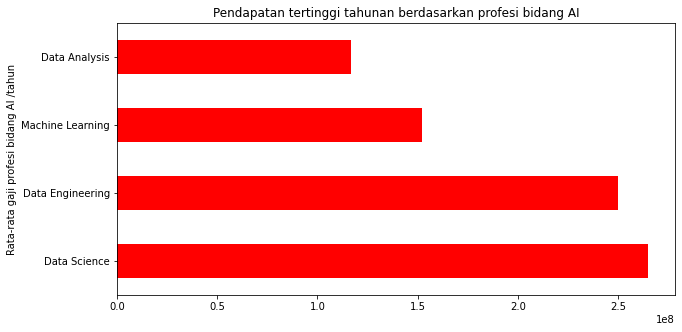

In [100]:
plt.figure(figsize=(10, 5))
data.groupby(['Bidang AI']).mean()['Gaji(Rp)_pertahun'].sort_values(ascending=False).plot(kind='barh',color='red')
plt.title('Pendapatan tertinggi tahunan berdasarkan profesi bidang AI')
plt.xlabel('')
plt.ylabel('Rata-rata gaji profesi bidang AI /tahun')

Text(0.5, 0, '')

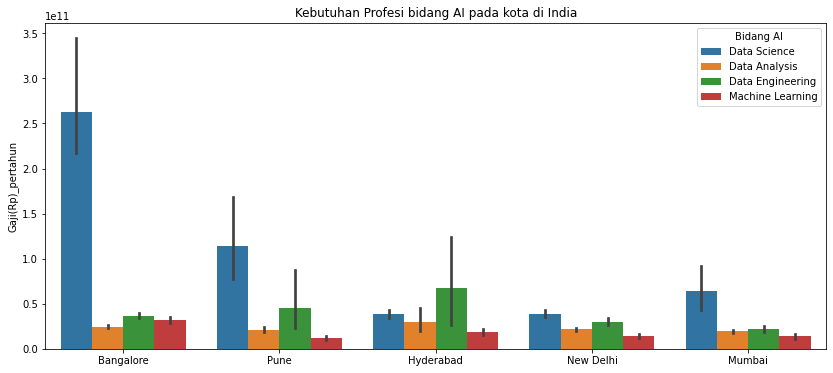

In [101]:
plt.figure(figsize=(14, 6))
sns.barplot(y="Gaji(Rp)_pertahun", x="Location", data=data,estimator=sum, hue="Bidang AI")
plt.title('Kebutuhan Profesi bidang AI pada kota di India')
plt.xlabel('')

Text(0.5, 1.0, '10 Perusahaan di India dengan rata-rata pendapatan tertinggi bidang AI')

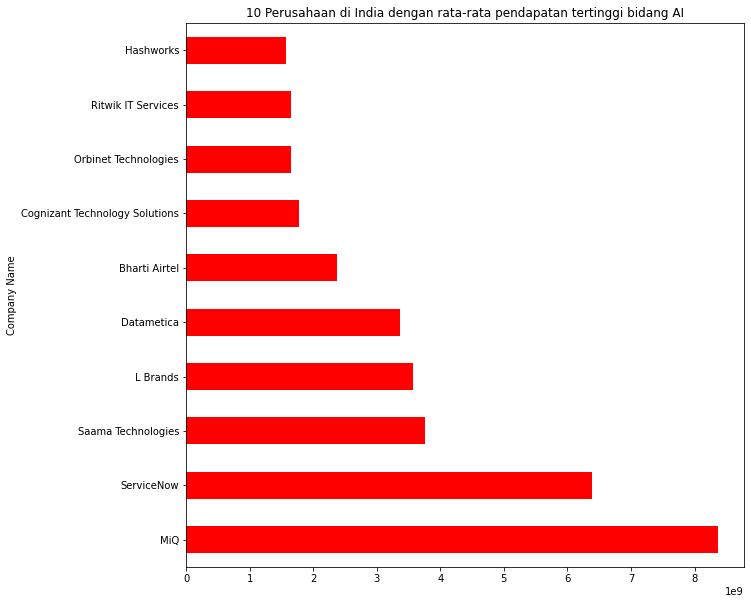

In [102]:
plt.figure(figsize=(10, 10))
data.groupby(['Company Name']).mean()['Gaji(Rp)_pertahun'].sort_values(ascending=False).head(10).plot(kind='barh',color='red')
plt.title('10 Perusahaan di India dengan rata-rata pendapatan tertinggi bidang AI')

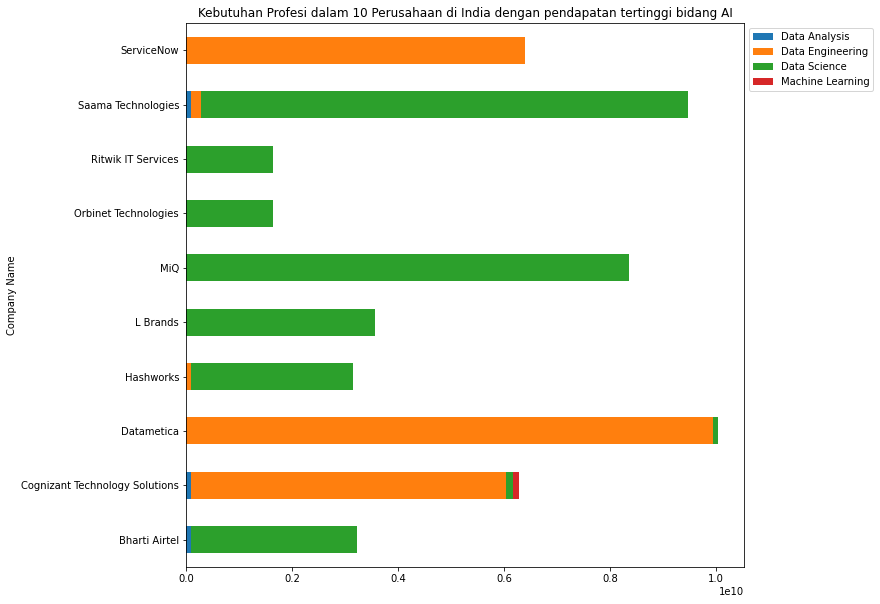

In [103]:
dataviz1 = data.groupby(['Company Name']).mean()['Gaji(Rp)_pertahun'].sort_values(ascending=False).head(10).reset_index()
columns = dataviz1['Company Name'].unique()

dataviz2 = data.groupby(['Bidang AI','Company Name']).mean()['Gaji(Rp)_pertahun'].sort_values(ascending=False).reset_index()
dataviz2 =  dataviz2[dataviz2['Company Name'].isin(columns)]
dataviz2 = dataviz2.pivot_table(index="Company Name", columns="Bidang AI", values="Gaji(Rp)_pertahun",fill_value=0)

dataviz2.plot(kind='barh', stacked=True,figsize=(10, 10))
plt.title('Kebutuhan Profesi dalam 10 Perusahaan di India dengan pendapatan tertinggi bidang AI')
plt.legend(loc='upper center',bbox_to_anchor=(1.12, 1))

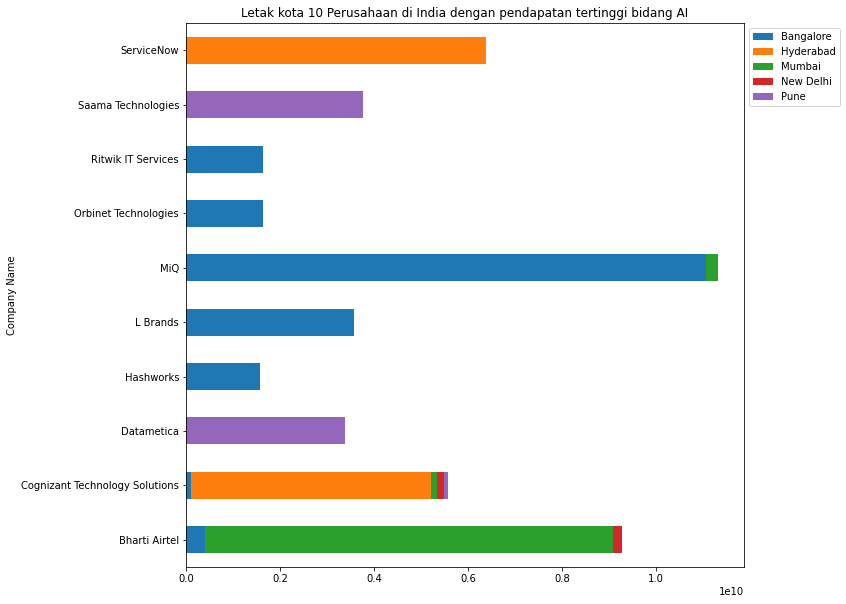

In [104]:
dataviz3 = data.groupby(['Location','Company Name']).mean()['Gaji(Rp)_pertahun'].sort_values(ascending=False).reset_index()
dataviz3 =  dataviz3[dataviz3['Company Name'].isin(columns)]
dataviz3 = dataviz3.pivot_table(index="Company Name", columns="Location", values="Gaji(Rp)_pertahun",fill_value=0)

dataviz3.plot(kind='barh', stacked=True,figsize=(10, 10))
plt.title('Letak kota 10 Perusahaan di India dengan pendapatan tertinggi bidang AI')
plt.legend(loc='upper center',bbox_to_anchor=(1.09, 1))